## Assignment 2: K-Nearest Neighbors Classification on CIFAR-10 (Cross-Validation Analysis)

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

c:\Users\hp\Documents\ENSET\computer vision\computer-vision-labs\cv_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


#### 1. DATA LOADING & PREPROCESSING

In [3]:
print("Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Loading CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [6]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


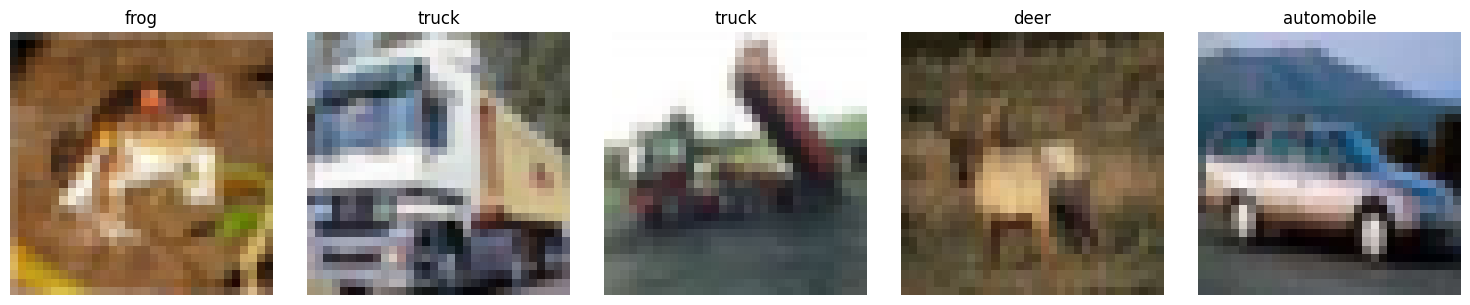

In [7]:
# Visualize sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Or display multiple images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].set_title(f"{class_names[y_train[i][0]]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Flatten and normalize
X_train_flat = X_train.reshape(50000, -1).astype('float32') / 255.0
X_test_flat = X_test.reshape(10000, -1).astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
print("X_train_flat shape:" , X_train_flat.shape)
print("X_test_flat shape:" , X_test_flat.shape)
print("y_train shape:" , y_train.shape)
print("y_test shape:" , y_test.shape)

X_train_flat shape: (50000, 3072)
X_test_flat shape: (10000, 3072)
y_train shape: (50000,)
y_test shape: (10000,)


In [17]:
# Use subset for computational efficiency
TRAIN_SIZE = 5000
TEST_SIZE = 1000

X_train_subset = X_train_flat[:TRAIN_SIZE]
y_train_subset = y_train[:TRAIN_SIZE]
X_test_subset = X_test_flat[:TEST_SIZE]
y_test_subset = y_test[:TEST_SIZE]

print(f"\nUsing subset: {TRAIN_SIZE} training, {TEST_SIZE} test samples")


Using subset: 5000 training, 1000 test samples


#### 2. CROSS-VALIDATION FOR HYPERPARAMETER TUNING

In [12]:
print("\n" + "="*70)
print("CROSS-VALIDATION: Finding optimal k value")
print("="*70)
# Test different k values
k_values = [1, 3, 5, 7, 10, 15, 20, 30, 50, 100]

# Store results
scores = {}
mean_scores = []
std_scores = []

for k in k_values:
  
    # Create classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    scores_per_fold = cross_val_score(knn, X_train_subset, y_train_subset, cv=5)
    
    # Store results
    scores[k] = scores_per_fold

    # Store mean and std
    mean_scores.append(scores_per_fold.mean())
    std_scores.append(scores_per_fold.std())
    
    print(f"k={k:3d}: mean={scores_per_fold.mean():.4f}, std={scores_per_fold.std():.4f}")
    print(f"  Individual fold scores: {scores_per_fold}")

k=  1: mean=0.2670, std=0.0122
  Individual fold scores: [0.269 0.246 0.273 0.283 0.264]
k=  3: mean=0.2488, std=0.0104
  Individual fold scores: [0.247 0.24  0.243 0.269 0.245]
k=  5: mean=0.2706, std=0.0145
  Individual fold scores: [0.258 0.251 0.285 0.288 0.271]
k=  7: mean=0.2752, std=0.0101
  Individual fold scores: [0.269 0.268 0.274 0.295 0.27 ]
k= 10: mean=0.2816, std=0.0048
  Individual fold scores: [0.277 0.287 0.286 0.283 0.275]
k= 15: mean=0.2758, std=0.0084
  Individual fold scores: [0.261 0.278 0.28  0.286 0.274]
k= 20: mean=0.2786, std=0.0048
  Individual fold scores: [0.281 0.269 0.282 0.281 0.28 ]
k= 30: mean=0.2734, std=0.0086
  Individual fold scores: [0.276 0.26  0.286 0.276 0.269]
k= 50: mean=0.2732, std=0.0079
  Individual fold scores: [0.278 0.268 0.286 0.27  0.264]
k=100: mean=0.2648, std=0.0052
  Individual fold scores: [0.267 0.258 0.273 0.261 0.265]


#### 3. VISUALIZATION

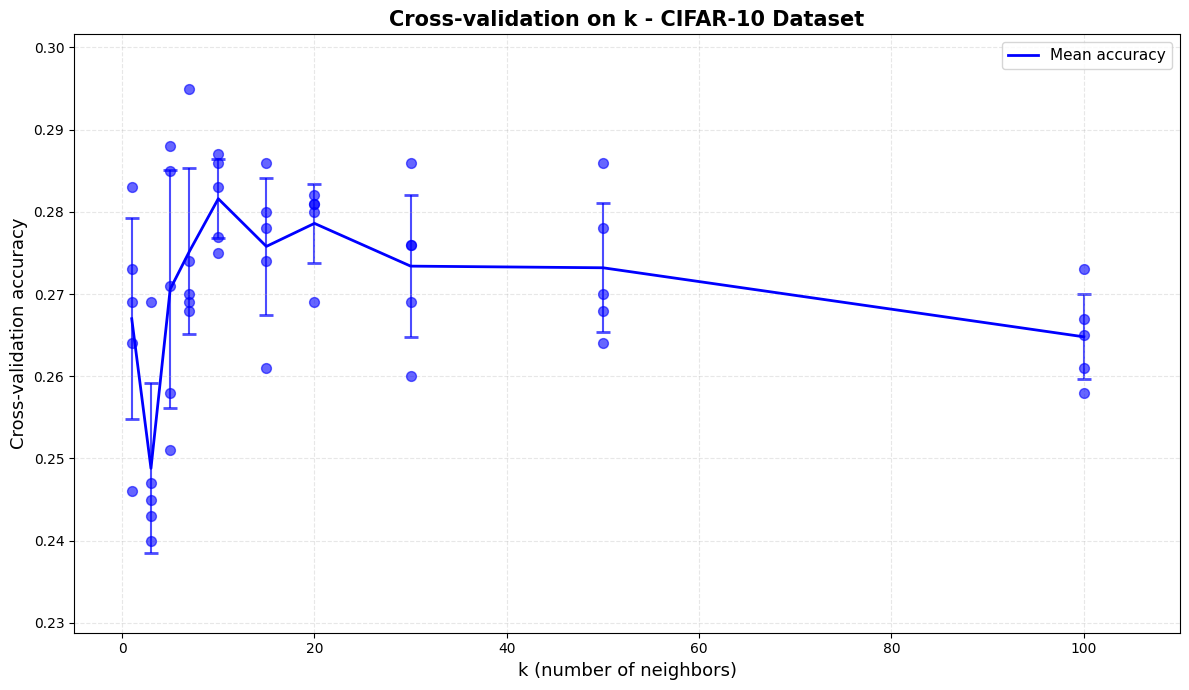

In [14]:
# Create the plot
plt.figure(figsize=(12, 7))

# Plot individual points (all 5 dots for each k)
for k in k_values:
    plt.scatter([k]*5, scores[k], color='blue', alpha=0.6, s=50, zorder=3)
    

# Plot mean line
plt.plot(k_values, mean_scores, 'b-', linewidth=2, label='Mean accuracy', zorder=2)

# Plot error bars (mean ± std)
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='none', 
             ecolor='blue', capsize=5, capthick=2, alpha=0.7, zorder=1)

# Labels and formatting
plt.xlabel('k (number of neighbors)', fontsize=13)
plt.ylabel('Cross-validation accuracy', fontsize=13)
plt.title('Cross-validation on k - CIFAR-10 Dataset', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')

# Set axis limits
plt.xlim(-5, max(k_values) + 10)
y_min = min(mean_scores) - 0.02
y_max = max(mean_scores) + 0.02
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


#### 4. RESULTS & BEST MODEL

In [15]:
# Find and display best k
best_k_idx = np.argmax(mean_scores)
best_k = k_values[best_k_idx]
best_score = mean_scores[best_k_idx]
best_std = std_scores[best_k_idx]

print(f"RESULTS:")
print(f"{'*'*70}")
print(f"Best k value: {best_k}")
print(f"Best mean accuracy: {best_score:.4f} ± {best_std:.4f}")

RESULTS:
**********************************************************************
Best k value: 10
Best mean accuracy: 0.2816 ± 0.0048


#### 5. FINAL MODEL EVALUATION

In [16]:
# 6. Train with best k on full training set
print("Training final model...")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_subset, y_train_subset)

# 7. Evaluate on test set
print("Evaluating...")
y_pred = knn_best.predict(X_test_subset)
accuracy = accuracy_score(y_test_subset, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# 8. Show classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
print("\nClassification Report:")
print(classification_report(y_test_subset, y_pred, target_names=class_names))

Training final model...
Evaluating...

Test Accuracy: 0.2770

Classification Report:
              precision    recall  f1-score   support

    airplane       0.33      0.48      0.39       103
  automobile       0.50      0.04      0.08        89
        bird       0.19      0.44      0.26       100
         cat       0.40      0.14      0.20       103
        deer       0.15      0.39      0.22        90
         dog       0.36      0.14      0.20        86
        frog       0.27      0.22      0.25       112
       horse       0.59      0.13      0.21       102
        ship       0.40      0.67      0.50       106
       truck       0.77      0.09      0.16       109

    accuracy                           0.28      1000
   macro avg       0.40      0.27      0.25      1000
weighted avg       0.40      0.28      0.25      1000

